In [63]:
import sqlite3 as lite
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import statistics

In [64]:
connection = lite.connect('lahman2014.sqlite')

# Part1

In [65]:
connection = lite.connect('lahman2014.sqlite')
query_team = "select*from Teams"
df_team = pd.read_sql(query_team,connection)


# Dealing with missing values in col_payroll,col_winPCT


In [66]:
win_percentage = (df_team['W']/df_team['G'])*100
df_team.insert(8,'Win_Percentage',win_percentage)
query = "Select *, SUM(salary) as payroll from Salaries Group by teamID,yearID "
df_salary = pd.read_sql(query,connection)
df_total = pd.merge(df_team,df_salary,on=['teamID','yearID'],how='inner')
df_total.head()

,yearID,lgID_x,teamID,franchID,divID,Rank,G,Ghome,Win_Percentage,W,...,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,lgID_y,playerID,salary,payroll
0,1985,AL,BAL,BAL,E,4,161,81.0,51.552795,83,...,2132387.0,97,97,BAL,BAL,BAL,AL,youngmi01,121000.0,11560712.0
1,1985,AL,BOS,BOS,E,5,163,81.0,49.693252,81,...,1786633.0,104,104,BOS,BOS,BOS,AL,staplda01,325000.0,10897560.0
2,1985,AL,CAL,ANA,W,2,162,79.0,55.555556,90,...,2567427.0,100,100,CAL,CAL,CAL,AL,zahnge01,550000.0,14427894.0
3,1985,AL,CHA,CHW,W,3,163,81.0,52.147239,85,...,1669888.0,104,104,CHW,CHA,CHA,AL,walkegr01,195000.0,9846178.0
4,1985,AL,CLE,CLE,E,7,162,81.0,37.037037,60,...,655181.0,99,100,CLE,CLE,CLE,AL,waddeto01,125000.0,6551666.0


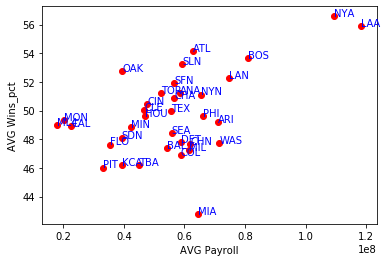

In [67]:
df_mean = df_total.groupby(['teamID'], as_index=False).aggregate({"Win_Percentage":"mean","payroll":"mean"})
x = df_mean['payroll']
y = df_mean['Win_Percentage']
fig,ax7=plt.subplots()
plt.xlabel('AVG Payroll')
plt.ylabel('AVG Wins_pct')
ax7.scatter( x, y,color='red')
for i , txt in enumerate(df_mean['teamID']):
  ax7.annotate( txt, xy=(df_mean["payroll"][i] , df_mean['Win_Percentage'][i]) , color='blue')
plt.show()

# Part2

In [ ]:
df_range = df_total.drop(df_total[df_total.yearID<1990].index)
df_range = df_range.drop(df_range[df_range.yearID>2014].index)

# Payroll distribution


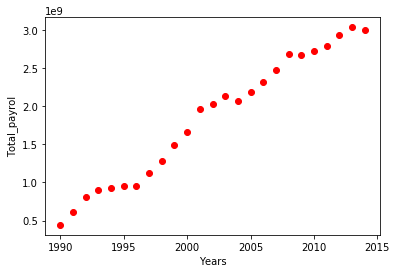

Mean:= 1846147876.56
standred_deviation:= 835105801.8536594


In [68]:
grouped = df_range.groupby('yearID')

total_payroll = []
year = []
for i in grouped:
    total_payroll.append(i[1]['payroll'].sum())
    year.append(i[0])
plt.xlabel('Years')
plt.ylabel('Total_payrol')
plt.plot(year,total_payroll,'ro')
plt.show()
payroll_mean = sum(total_payroll)/len(total_payroll)
st_dev_payroll = statistics.stdev(total_payroll)
print('Mean:=',payroll_mean)
print('standred_deviation:=',st_dev_payroll)

- payroll increase as years increase

# Correlation between payroll and winning percentage


In [69]:
def plotting(df):
    fig, ax = plt.subplots()
    colors = cm.rainbow(np.linspace(0, 1, len(df["payroll"])))
    ax.scatter(df["payroll"], df["Win_Percentage"], color=colors)
    for i, txt in enumerate(df['teamID']):
        ax.annotate(txt, xy=(df["payroll"][i], df["Win_Percentage"][i]), color='red')
    plt.xlabel('AVG_Payroll')
    plt.ylabel('AVG_win pct')
    plt.show()

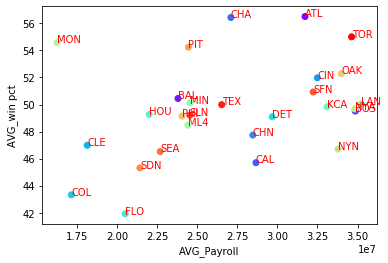

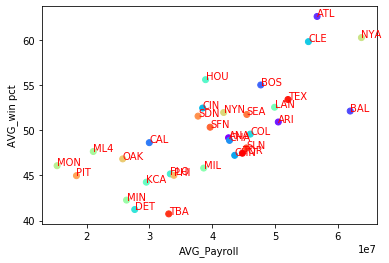

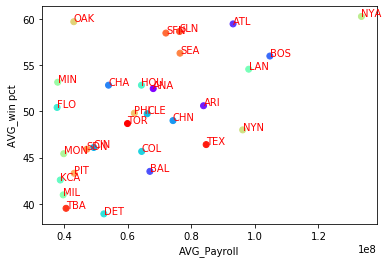

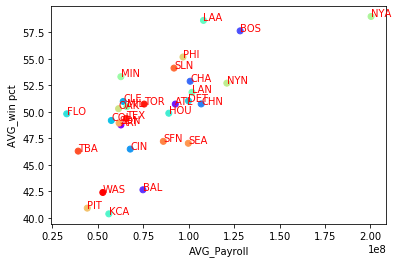

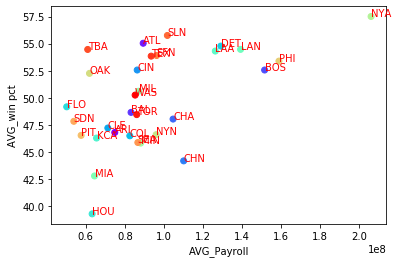

In [70]:
df_range1 = df_total[df_total['yearID'].isin(range(1990,1995))]
df_mean1 = df_range1.groupby(['teamID'], as_index=False).aggregate({"Win_Percentage":"mean","payroll":"mean"})
plotting(df_mean1)

df_range2 = df_total[df_total['yearID'].isin(range(1995,2000))]
df_mean2 = df_range2.groupby(['teamID'], as_index=False).aggregate({"Win_Percentage":"mean","payroll":"mean"})
plotting(df_mean2)

df_range3 = df_total[df_total['yearID'].isin(range(2000,2005))]
df_mean3 = df_range3.groupby(['teamID'], as_index=False).aggregate({"Win_Percentage":"mean","payroll":"mean"})
plotting(df_mean3)

df_range4 = df_total[df_total['yearID'].isin(range(2005,2010))]
df_mean4 = df_range4.groupby(['teamID'], as_index=False).aggregate({"Win_Percentage":"mean","payroll":"mean"})
plotting(df_mean4)

df_range5 = df_total[df_total['yearID'].isin(range(2009,2015))]
df_mean5 = df_range5.groupby(['teamID'], as_index=False).aggregate({"Win_Percentage":"mean","payroll":"mean"})
plotting(df_mean5)


- we can see from the scatter plotts that the more teams have played the more spread in payroll,and team 'NYA' have seemed to have the highest payroll excpet in the range of 1990-1995 may his payroll became less but in others it has the highest.
- okland was doing better from 1991-1995 as it get high payroll then it's effiency became to retarded

# Part3

In [71]:
selected_cols = df_total[['yearID','payroll']]
#Avg_4_year=selected_cols.groupby('yearID').sum()/selected_cols.groupby('yearID').count()
Avg_4_year = selected_cols.groupby(['yearID'], as_index=False).aggregate({"payroll":"mean" })


# Standardizing across years

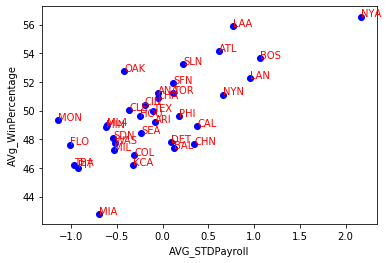

In [55]:
std_4_year = selected_cols.groupby(['yearID'], as_index=False).aggregate({"payroll":"std" })
stand=[]

for i in range(len(Avg_4_year['yearID'])):
     s_val=Avg_4_year['yearID'][i]
     for j in range(len(df_total['yearID'])):
        if df_total['yearID'][j]==s_val:
          val=df_total['payroll'][j]-Avg_4_year['payroll'][i]
          stand.append(val/std_4_year['payroll'][i])
selected_cols.insert(2,'Std_payroll' , stand ,True)
selected_cols.insert(1,'teamID' , df_total['teamID'],True)
Avg_std_payroll = selected_cols.groupby(['teamID'], as_index=False).aggregate({"Std_payroll":"mean" })
fig,ax8=plt.subplots()
plt.xlabel('AVG_STDPayroll')
plt.ylabel('AVg_WinPercentage')
ax8.scatter(Avg_std_payroll["Std_payroll"] , df_mean['Win_Percentage'],color='blue')
for i , txt in enumerate(Avg_std_payroll['teamID']):
  ax8.annotate( txt, xy=(Avg_std_payroll["Std_payroll"][i] , df_mean['Win_Percentage'][i]) , color='red')
plt.show()

- the difference between this figure and the figure from 'Part 1' is that the scale of each point is incearsed and became more space between each point than first fig and this is due to the data transformation.

# Expected wins

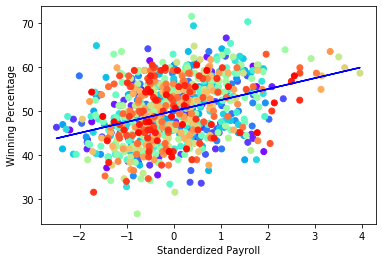

In [56]:
def expected_wins(std_payroll):
    return 50 + 2.5 * std_payroll
expected=[]

fig,ax9=plt.subplots()
colors = cm.rainbow(np.linspace(0, 1, len(stand)))
ax9.scatter(stand, df_total['Win_Percentage'],color=colors )
for i in stand:
    expected.append(expected_wins(i))
ax9.plot(stand,expected , color='blue')
plt.xlabel('Standerdized Payroll')
plt.ylabel('Winning Percentage')
plt.show()

- from the scattered plot we see that the line kind of divides the the data into half, which means that if a team spend an amount of payroll they would win kind of 50% of their games.

# Spending efficiency

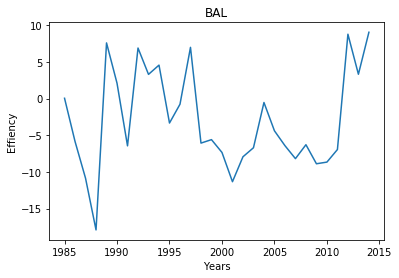

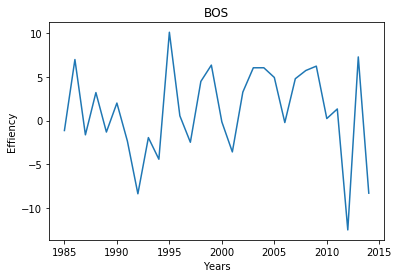

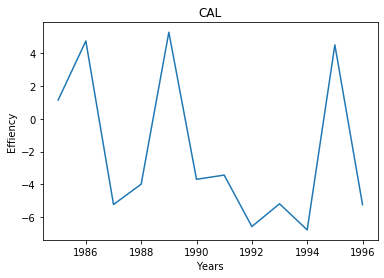

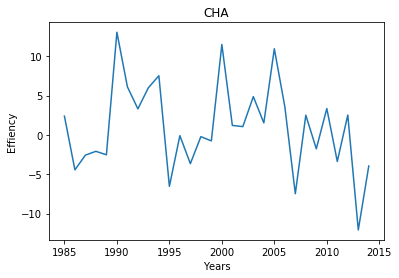

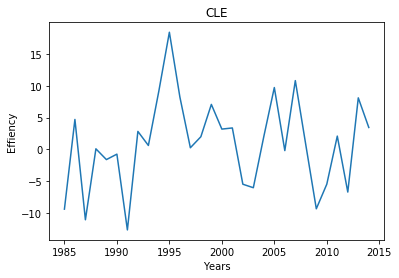

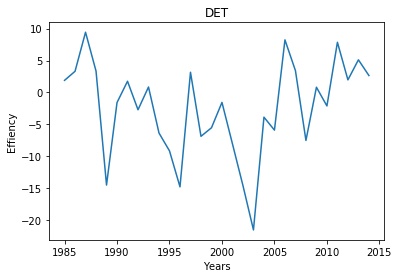

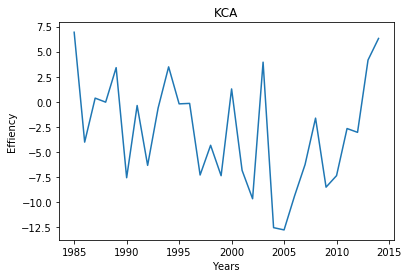

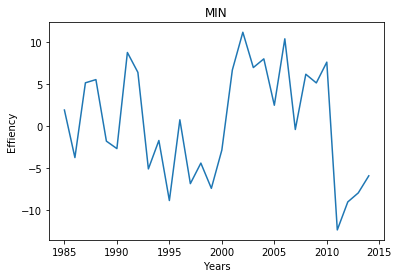

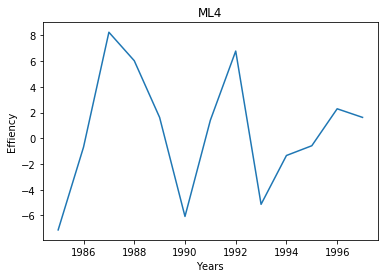

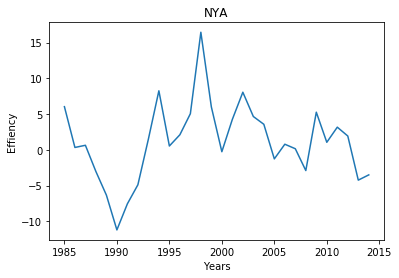

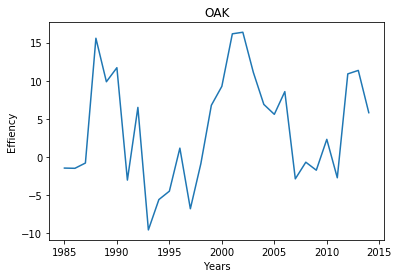

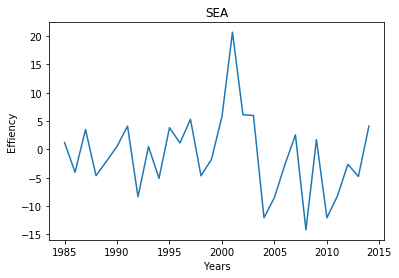

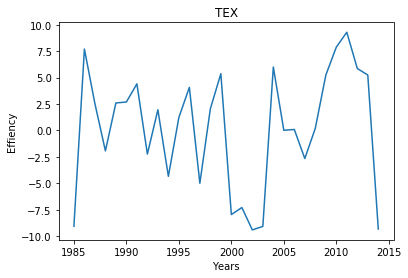

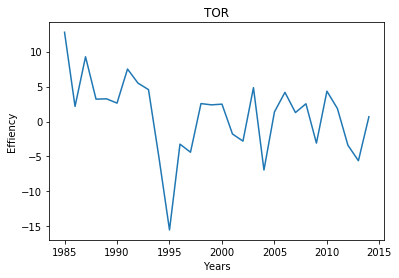

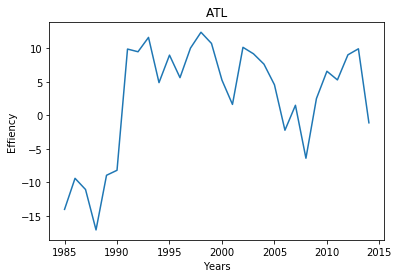

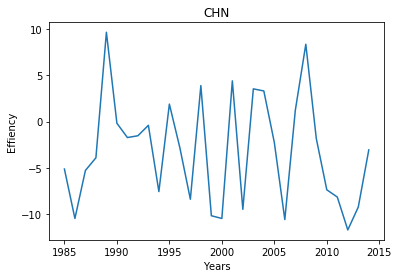

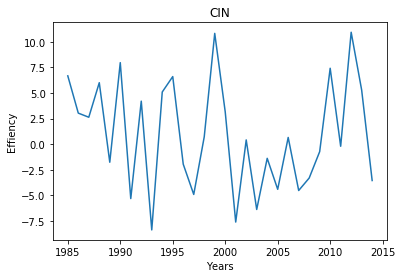

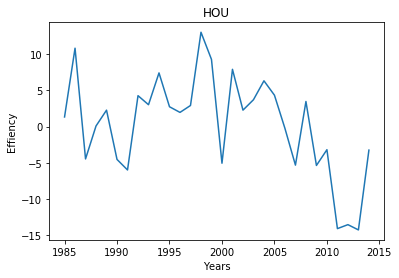

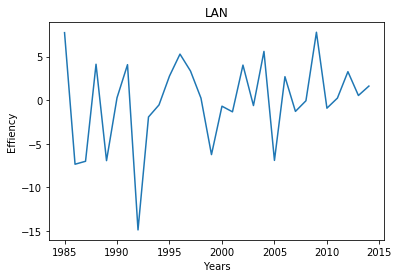

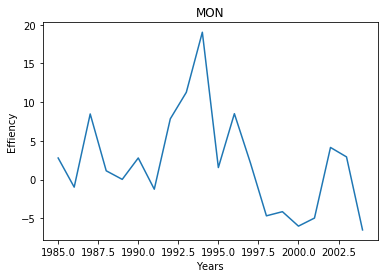

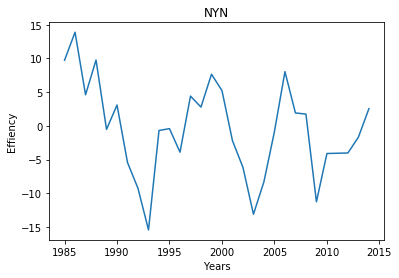

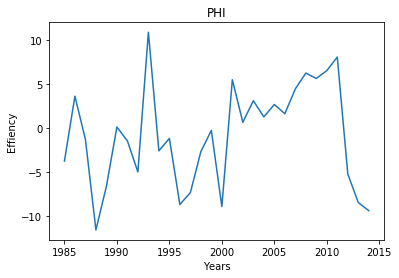

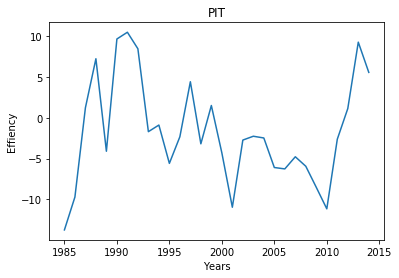

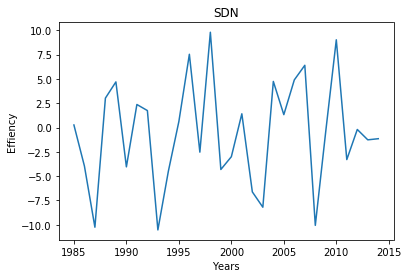

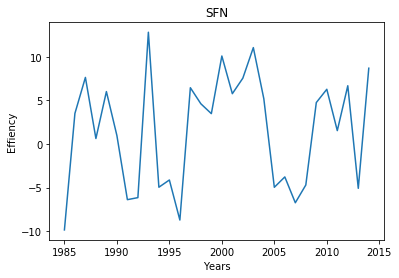

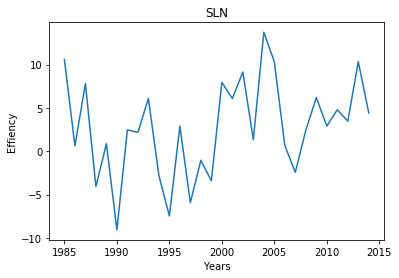

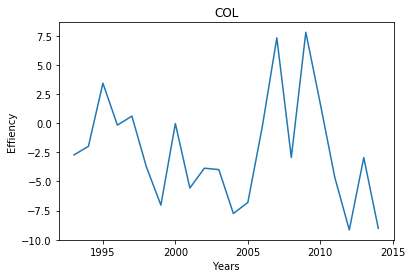

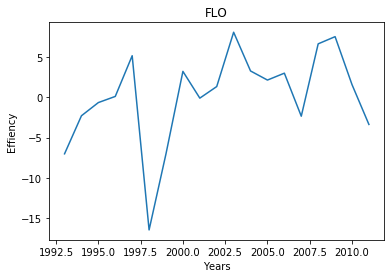

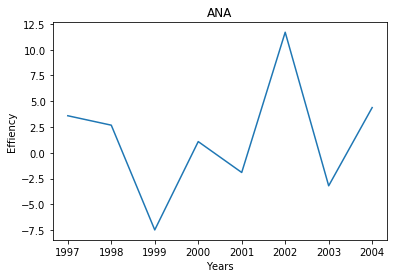

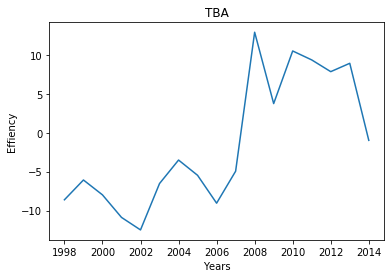

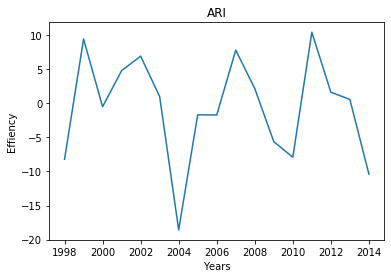

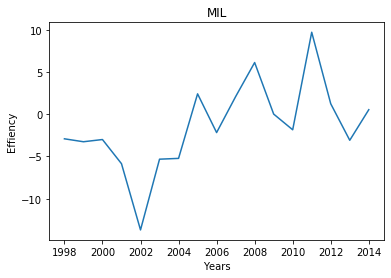

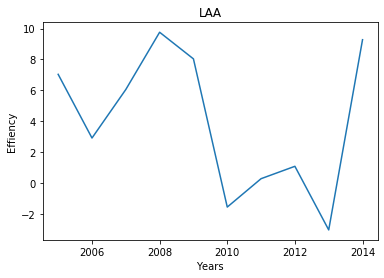

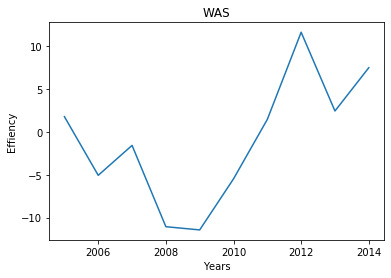

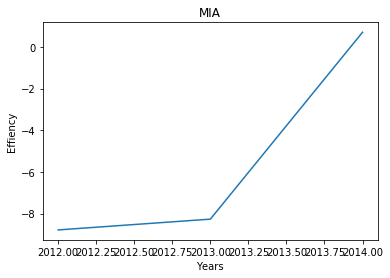

In [57]:
selected_cols.insert(3,'Expected_wins',expected)
var_diff=df_total['Win_Percentage']-selected_cols['Expected_wins']
selected_cols.insert(4,'Effiency',var_diff)
team_names=selected_cols.teamID.unique()
for i in team_names:
    data=selected_cols[selected_cols['teamID']==i]
    plt.plot(data['yearID'],data['Effiency'])
    plt.title(i)
    plt.xlabel('Years')
    plt.ylabel('Effiency')
    plt.show()


- oakland seemed to be best team as it's growth from 1995-2000 and  keeps it's high performance from 2000-2005 but then it became to retarded.